# BIKE SHARING CASE STUDY

## Step 1 - Importing libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [38]:
import warnings
warnings.filterwarnings('ignore')

## Step 2 - Data loading and understanding

In [39]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [40]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Apparently there are no non_null values or missing values present in the data set, the data is quite clean. However we can conclude it after checking the outliers using boxplots

In [41]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [42]:
day.shape

(730, 16)

In [43]:
day.ndim

2

Data understanding

- As we can see above the dataset contains 16 columns and 730 rows

- All the features are of datatypes like integer and float

- The dataset doesn't seem to have outliers, however this can be confirmed later using boxplots

## Step 3 - Data cleaning

1. Columns such as 'instant','casual','registered','dteday' are unimportant to our analysis because of their following features
2. 'instant' is an index column we do not need it
3. 'dteday' is unimportant since we have 'year' and 'month' columns
4. 'casual' and 'registered' are not needed because the column 'cnt' already has both casual and registered users there 

In [44]:
day = day.drop(['instant'], axis=1)
day = day.drop(['casual'], axis=1)
day = day.drop(['registered'], axis=1)
day = day.drop(['dteday'], axis=1)
day = day.drop(['atemp'], axis=1)

In [45]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


### Handling missing values

In [ ]:
day.isnull().sum()

#The dataset has no missing values

Before converting the values in the non binary columns to zeros and ones it is necessary that we first convert them back to their original state.

In [46]:
day.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

day.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

day.mnth = day.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

day.weekday = day.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,43.6957,12.522300,1600


## Exploratoroy data analysis

Text(0.5, 1.0, 'cnt v/s hum')

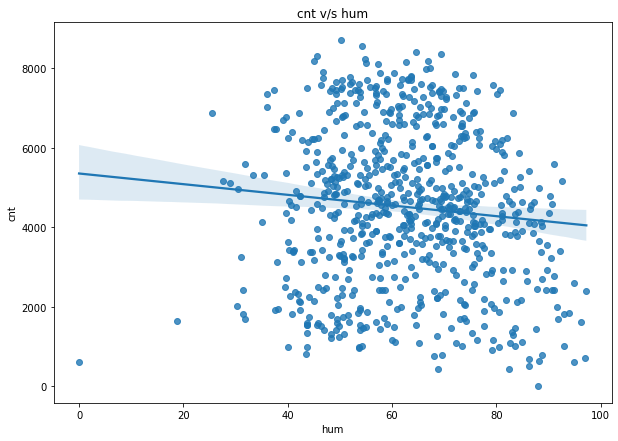

In [47]:
plt.figure(figsize=(10,7))
sns.regplot(data = day, x='hum', y='cnt')
plt.title('cnt v/s hum')

In [ ]:
plt.figure(figsize=(10,7))
sns.regplot(data=day, x='windspeed', y='cnt')
plt.title('windspeed v/s cnt')

#### As we can see above value of cnt decreases as humidity increases

Text(0.5, 1.0, 'temperature v/s cnt')

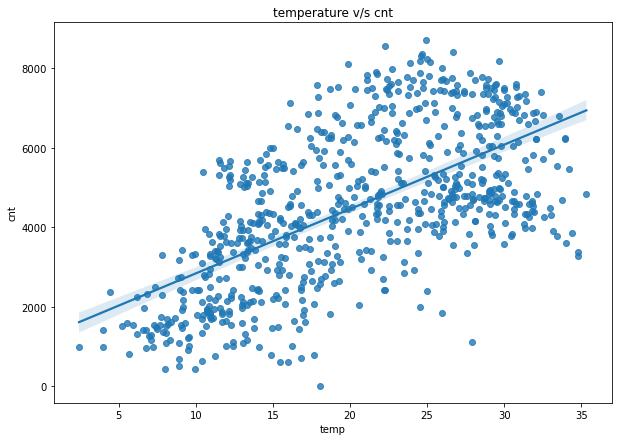

In [48]:
plt.figure(figsize=(10,7))
sns.regplot(data=day, x='temp', y='cnt')
plt.title('temperature v/s cnt')

#### Inference

As we can see above the value of cnt increases as the temperature increases

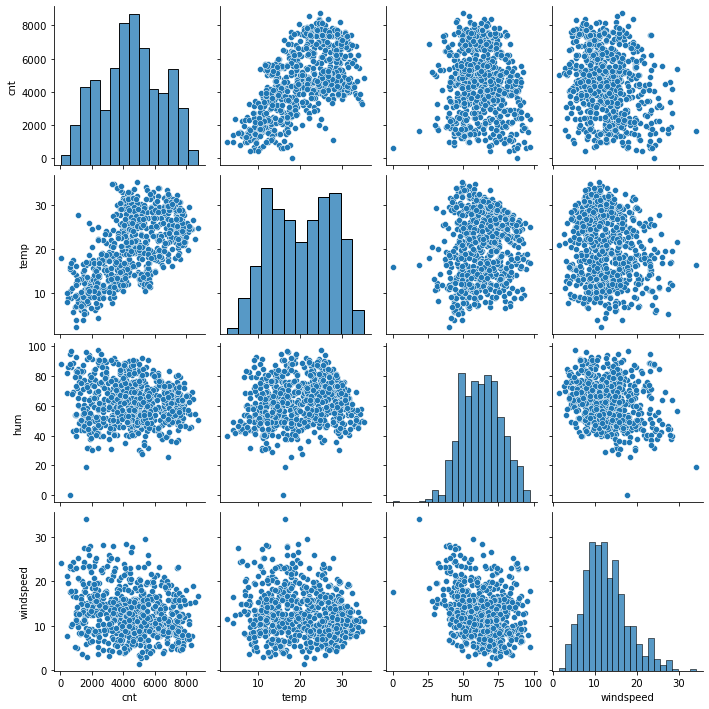

In [49]:
sns.pairplot(data=day, vars=['cnt','temp','hum','windspeed'])

#### Inference

As we can see in the graph 'temp' and 'atemp' have linear relationship with 'cnt'

<Figure size 1440x1080 with 0 Axes>

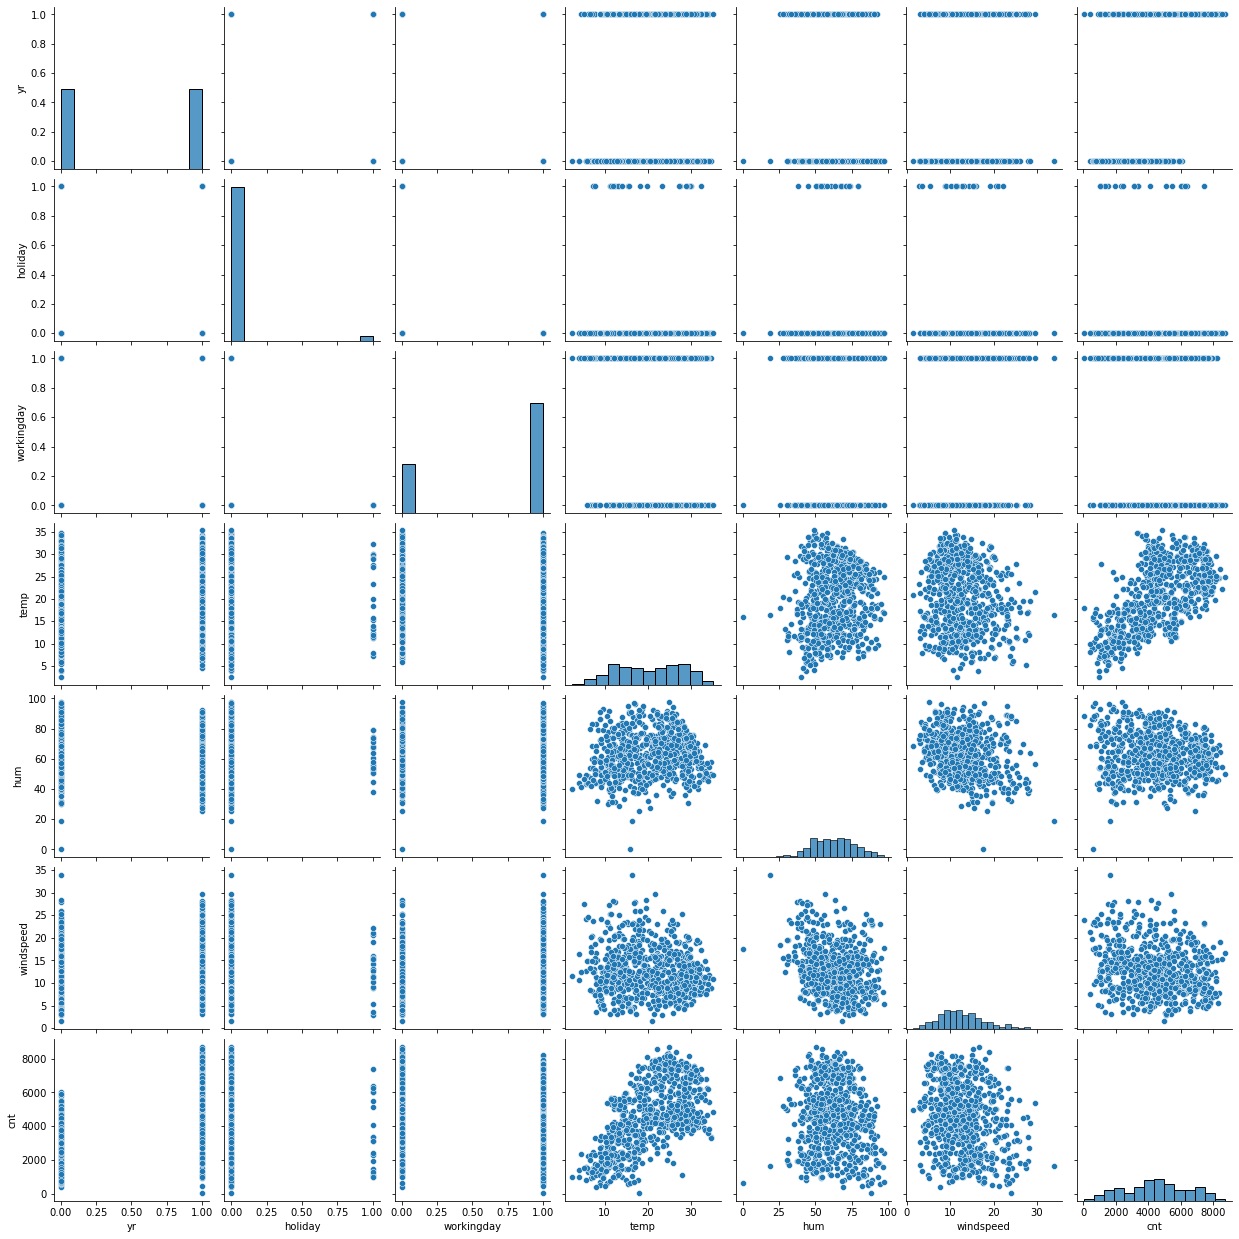

In [50]:
plt.figure(figsize=(20,15))
sns.pairplot(day)

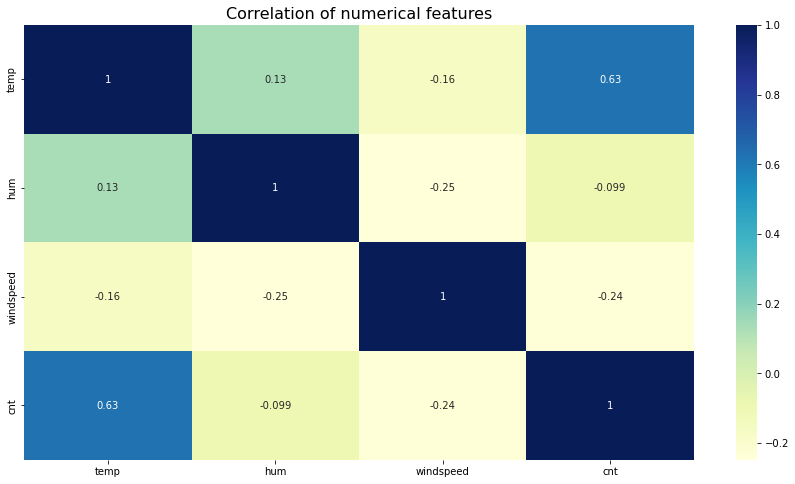

In [51]:
num_features = ["temp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8))
plt.title("Correlation of numerical features",fontsize=16)
sns.heatmap(day[num_features].corr(),annot= True,cmap="YlGnBu")
plt.show()

### Inference

As we can see above temperature is correlated with the target variable 
It seems to me that the bike sharing demand is affected by temperature alot

<AxesSubplot:>

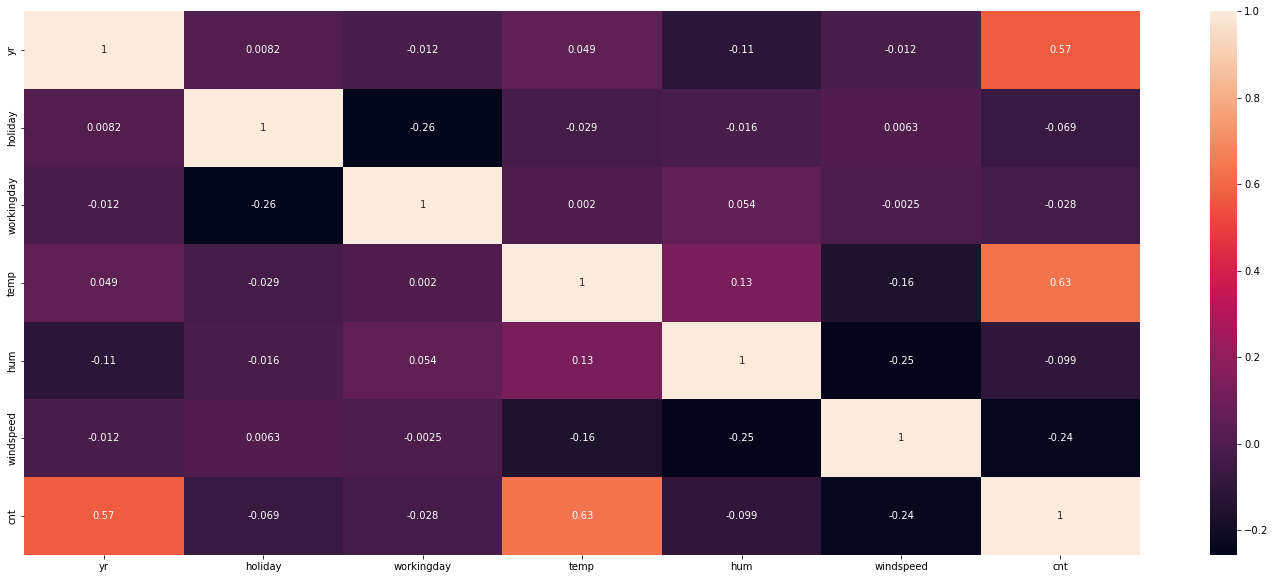

In [52]:
cor = day.corr()
plt.figure(figsize=(25,10))
sns.heatmap(cor, annot=True)

#### Inference

Year & Temperature are correlated with the target variable 

## Let's see the relationship of each categorical variable with the target variable 'cnt'

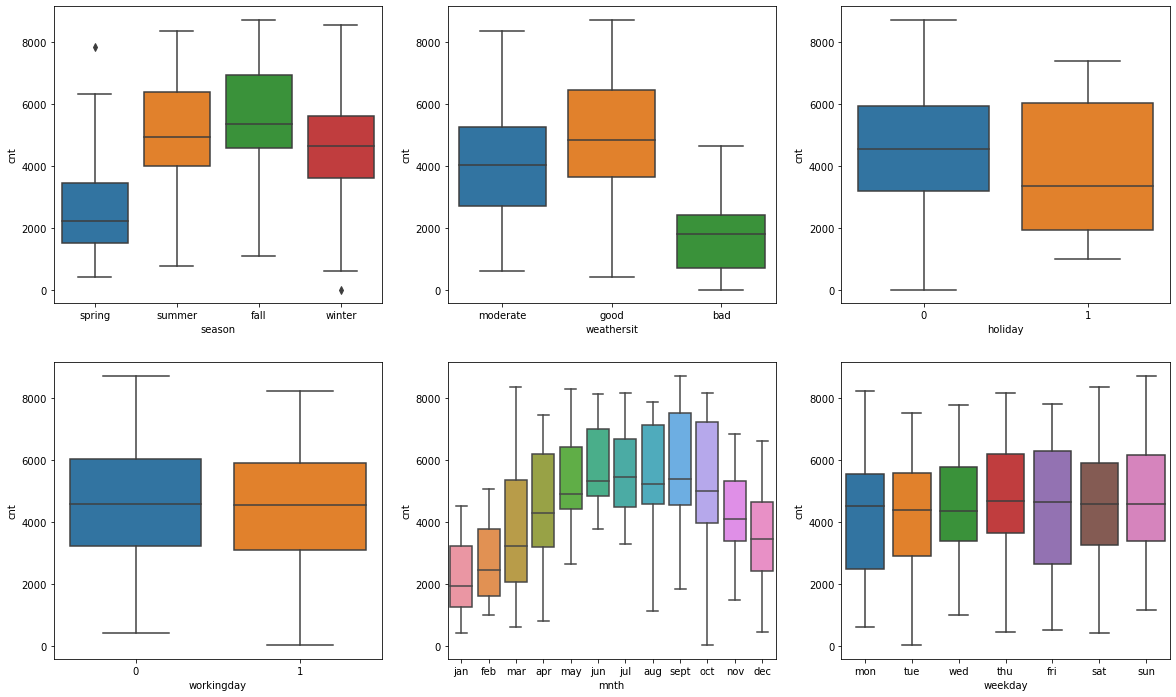

In [53]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y='cnt', data = day)

plt.subplot(2,3,2)
sns.boxplot(x='weathersit', y='cnt', data=day)

plt.subplot(2,3,3)
sns.boxplot(x='holiday', y='cnt', data=day)

plt.subplot(2,3,4)
sns.boxplot(x='workingday', y='cnt',data=day)

plt.subplot(2,3,5)
sns.boxplot(x='mnth',y='cnt', data=day )

plt.subplot(2,3,6)
sns.boxplot(x='weekday',y='cnt',data=day)

plt.show()


### Inference


1.We can see that During 'fall', 'summer' and 'winter' bike sharing demand being high and low during 'spring'.

2.When the weather situation is 'good' and 'moderately good' demand for bike sharing is high

3.The demand for bike sharing keeps rising from 'march' till 'sept' but begins to fall from 'oct' 

4.Bike sharing activity is more on thursday, friday and sunday. 

5.Both in workingdays and non-working days  demand for bike sharing is same

Outliers are not present in any of the variables except for season but this outlier looks normal doesn't need to be handled.

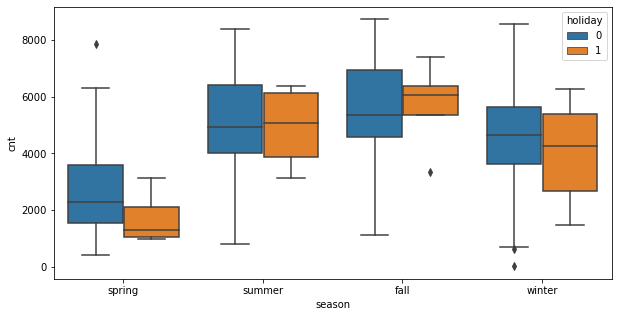

In [54]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = day)
plt.show()

#### Inference

* As we can see from the graph during holidays or weekends of Fall and summer there is increase in demand for bike sharing

* During spring the demand is less.

## Data Preparation

Few columns in the datasets have categorical values therefore those should be converted into numeric ones 

In [ ]:
day.head()

In [55]:
day = pd.get_dummies(data=day,columns=["season","mnth","weekday"],drop_first=True)
day = pd.get_dummies(data=day, columns=['weathersit'])

In [56]:
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# Split the data into training and test

In [57]:
# checking the shape before splitting
day.shape

(730, 30)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
#y to contain only target variable
y=day.pop('cnt')

#X is all remainign variable also our independent variables
X=day

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [60]:
X_train.shape

(511, 29)

In [61]:
y_train.shape

(511,)

In [62]:
X_test.shape

(219, 29)

## Scaling

- All the features have values in range of zeros and ones except for continous variables

- Scaling is done to have the values of continuous variables  in range of zeros and ones

In [64]:
#Let's scale the continuous variables
num_vars = ['temp','hum','windspeed']

In [65]:
scaler = MinMaxScaler()

In [66]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [67]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.654174,0.414873,0.230920,0.258317,0.250489,0.074364,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.143648,0.185619,0.421834,0.438138,0.433719,0.262619,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.756977,0.526481,0.000000,1.000000,0.500000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.639330,0.327101,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.731215,0.419004,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.509660,0.708724,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.785745,0.415925,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.817947,0.110593,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [122]:
day['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

## Model building- Automated approach

Building linear regression model using sklearn for RFE

In [69]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Using automated method to reduce the number of features to 15

In [70]:
rfe = RFE(lr,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [71]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 15),
 ('mnth_jan', False, 8),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 4),
 ('weekday_sat', False, 13),
 ('weekday_sun', False, 10),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 5),
 ('weekday_wed', False, 6),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

## mannual method 

In [72]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    return lm


Function for calculating VIFs

In [73]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features']= df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF', ascending=False))

In [74]:
# Features selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [75]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [76]:
# Taking 15 columns selected by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']]

In [77]:
X_train_rfe.shape

(511, 14)

#  Model building

##  1. Model - Starting with all the variables selected by RFE

In [78]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

In [79]:
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.03e-186
Time:                        17:20:49   Log-Likelihood:                -4125.1
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     496   BIC:                             8344.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2792.3701    338.868     

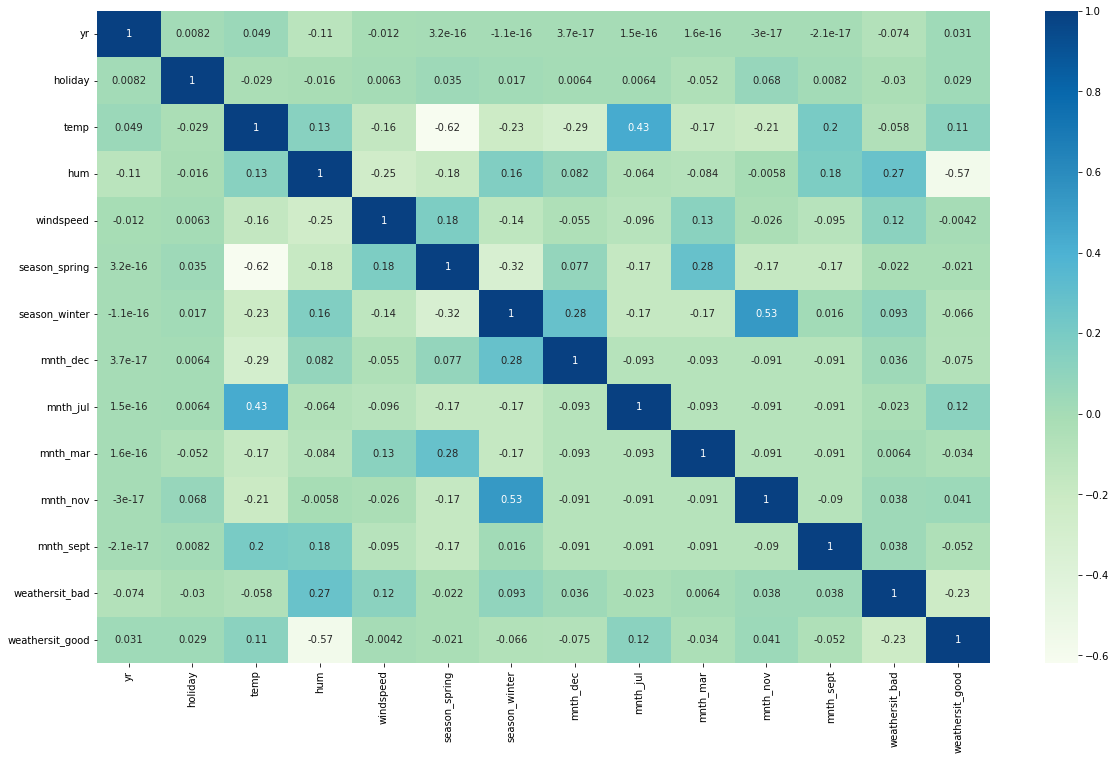

In [80]:
# Let's check the correlation of these 15 features and understand their impact on target variable
plt.figure(figsize=(20,12))
sns.heatmap(day[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']].corr(),cmap='GnBu',annot=True)
plt.show()

## Model 2

In [81]:
# Dropping the variable 'hum'
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar','mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.75e-184
Time:                        17:20:51   Log-Likelihood:                -4133.2
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     497   BIC:                             8354.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1806.4555    235.127     

## Model 3 

In [82]:
# removing 'mnth_jul'
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_mar','mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.51e-183
Time:                        17:21:00   Log-Likelihood:                -4138.2
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     498   BIC:                             8357.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1955.7824    232.271     

## model 4

In [83]:
# removing 'season_spring'
cols = ['yr', 'holiday', 'temp', 'windspeed',
       'season_winter', 'mnth_dec', 'mnth_mar','mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     180.0
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          8.99e-166
Time:                        17:21:09   Log-Likelihood:                -4183.1
No. Observations:                 511   AIC:                             8390.
Df Residuals:                     499   BIC:                             8441.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             387.1921    183.250     

## model 5

In [85]:
# removing 'mnth_mar

cols = ['yr', 'holiday', 'temp', 'windspeed',
       'season_winter', 'mnth_dec','mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          3.68e-166
Time:                        17:22:24   Log-Likelihood:                -4184.9
No. Observations:                 511   AIC:                             8392.
Df Residuals:                     500   BIC:                             8438.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             472.2237    178.104     

## model 6

In [86]:
# removing 'mnth_nov'
cols = ['yr', 'holiday', 'temp', 'windspeed',
       'season_winter', 'mnth_dec',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     215.1
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          7.96e-166
Time:                        17:26:22   Log-Likelihood:                -4188.5
No. Observations:                 511   AIC:                             8397.
Df Residuals:                     501   BIC:                             8439.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             422.8730    178.197     

## model 7

In [88]:
# removing 'mnth_dec

cols = ['yr', 'holiday', 'temp', 'windspeed',
       'season_winter',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     237.8
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.34e-165
Time:                        17:27:07   Log-Likelihood:                -4192.4
No. Observations:                 511   AIC:                             8403.
Df Residuals:                     502   BIC:                             8441.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             305.6693    174.339     

## Inference

As we can see in the model 7, p-value of all the features is nearly 0, R-square is 0.791. Therefore let's consider this as our final model

The model 6 has all the important statistical features like-

----  Higher R-squared, Adjusted R-squared and F-statistic, with no multicolinear variables (low vif)

----  Difference between R-squared and Adjusted R-squared values is less meaning need not to remove any other variable from this model

In [89]:
def build_model_sk(X,y):
    lr1=LinearRegression()
    lr1.fit(X,y)
    return lr1

In [101]:
# building the final model using sklearn
cols = ['yr', 'holiday', 'temp', 'windspeed',
       'season_winter', 'mnth_dec','mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
# build model with the chosen columns
lr = build_model_sk(X_train[cols], y_train)
print(lr.intercept_, lr.coef_)

472.22371533047726 [ 1979.22929103  -766.25210571  4952.05028263  -657.1557515
  1245.35579365  -582.36646419  -462.14164087   506.14360524
 -1515.94161137   623.00025764]


# Model evaluation

## Residual analysis

In [102]:
y_train_pred = lr.predict(X_train[cols])

In [103]:
# Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

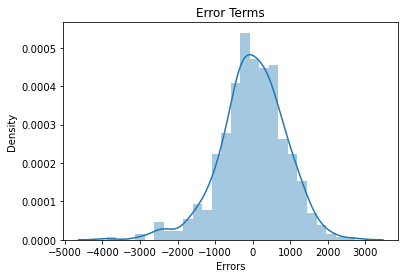

In [104]:
plot_res_dist(y_train, y_train_pred)

Errors are normally distributed with mean 0

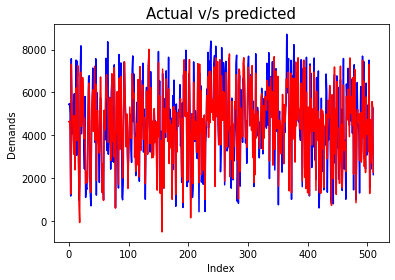

In [105]:
# Actual v/s predicted
c = [i for i in range(0, len(X_train),1)]
plt.plot(c, y_train, color='blue')
plt.plot(c, y_train_pred, color='red')
plt.title('Actual v/s predicted', fontsize=15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Both Actual and Predicted are showing the same pattern

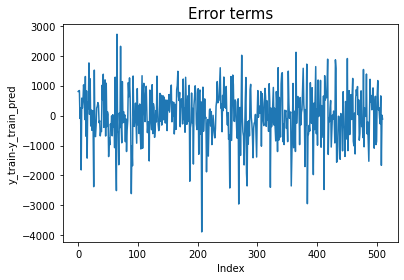

In [106]:
# Error terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c, y_train-y_train_pred)
plt.title('Error terms', fontsize=15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

The error terms are independent of each other

In [107]:
# print R-squared value
r2_score(y_train,y_train_pred)

0.7972711376945244

## Inference

R2 is same as what we obtained in our final model

# Linearity check

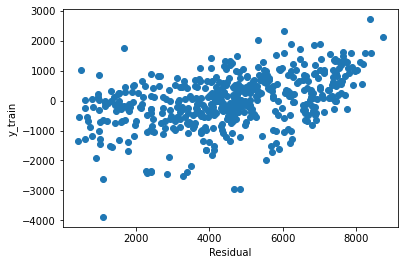

In [108]:
# Using scatterplot for the check
residual = (y_train-y_train_pred)
plt.scatter(y_train, residual)
plt.ylabel('y_train')
plt.xlabel('Residual')
plt.show()

As we can see in the graph even though the all points are not alligned in the center they still show linear pattern

## Predict values for the test data

In [109]:
#scale the variable in X_test
num_vars = ['temp','windspeed','hum']

# Test data to be transformed
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [110]:
# columns from our final model
cols = ['yr', 'holiday', 'temp', 'windspeed',
       'season_winter', 'mnth_dec','mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
#predict the values for test data
y_test_pred = lr.predict(X_test[cols])

## R-squared values for test predictions

In [111]:
# R-squared value between test and predicted test datasets
r2_score(y_test, y_test_pred)

0.8002047238695555

## Homoscedacity

Plotting y-test and y_test_pred to understand the spread

Text(0, 0.5, 'y_test_pred')

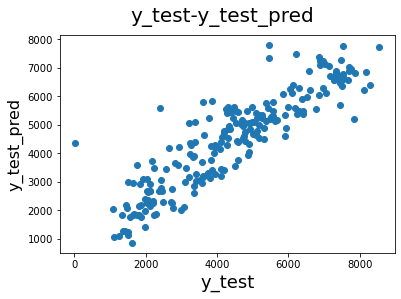

In [112]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.subtitle('y_test-y_test_pred', fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

## Inference

We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

# Plot test v/s predicted test values


In [113]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act,color='blue',linewidth=2.5, linestyle = '-')
    plt.plot(c,pred,color='red',linewidth=2.5, linestyle = '-')
    fig.suptitle('Actual and Predicted - '+dataname,fontsize=20)
    plt.xlabel('Index',fontsize=18)
    plt.ylabel('Counts', fontsize=16)

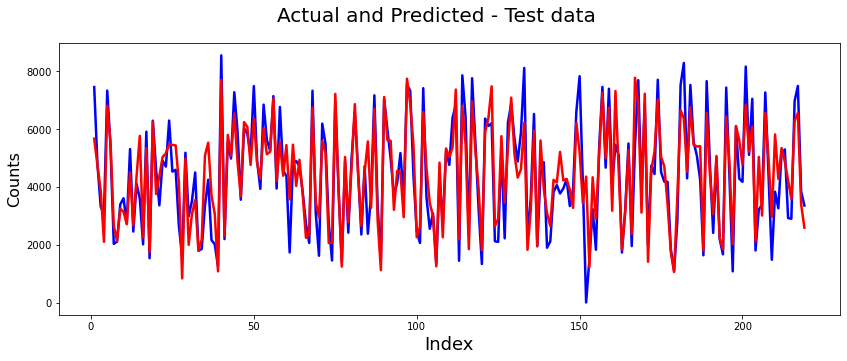

In [114]:
# Plot Actual v/s predicted for Test data
plot_act_pred(y_test, y_test_pred,len(y_test)+1,'Test data')

## Inference

As we can see predictions for test data is very close to actuals

# Plot error terms for test data

In [115]:
# Error terms
def plot_err_terms(act,pred):
    c=[i for i in range(1,220,1)]
    fig=plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color='blue',marker='o',linewidth=2.5,linestyle="")
    fig.suptitle('Error terms',fontsize=20)
    plt.xlabel('Index',fontsize=18)
    plt.ylabel('Counts-Predicted counts', fontsize=16)

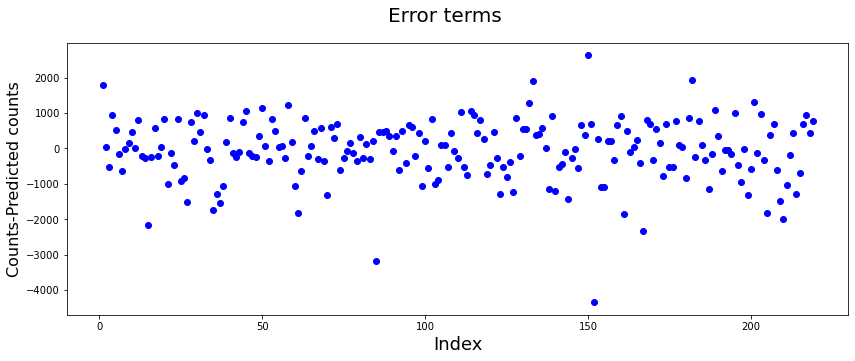

In [116]:
plot_err_terms(y_test,y_test_pred)

## Inference

As we can see the error terms are randomly distributed explaining the model quite well.

# Making predictions

In [117]:
# checking the data before prediction
day.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,80.5833,10.749882,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Interpretting the model

Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [118]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'holiday', 'temp', 'windspeed',
       'season_winter', 'mnth_dec','mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          3.68e-166
Time:                        17:40:34   Log-Likelihood:                -4184.9
No. Observations:                 511   AIC:                             8392.
Df Residuals:                     500   BIC:                             8438.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             472.2237    178.104     

# Interepretation of results

Train R^2 :0.797

Test R^2 :0.80

This seems to be a good model that can 'Generalize' various datasets.

## Analysing the above model, the comapany should focus on the following features:

Company should focus on expanding business during Spring.
Company should focus on expanding business during September.
Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
There would be less bookings during Light Snow or Rain, they could probably use this time to serve the bikes without having business impact.

### Significant variables to predict the demand for shared bikes

* holiday - demand will be more on holidays and weekends

* temp -Demand is high when the temperature is less  

* hum - Demand is Less when humidity is high

* windspeed - Less demand when the windspeed is high

* Season- Fall,Summer and winter demand is high

* months(August, July, September, October) high demand in these months

* Year (2019)

* weathersit( Light Snow, Mist + Cloudy)